### In this hands on you will be using Gated Recurrent Units to predict the airline passenger count in a given month based on the information from previous months.

- Follow the instructions provided for each cell and and code accordingly. 
- In order to run the cell press shift+enter.
- make sure you have run all the cells before submitting the hands on

### Run the below cell to import necessary packages

In [ ]:
# pip install -U scikit-learn

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

- Read data from air_line.csv file using pandas and assign the values of "passenger_count" column to variable **dataset**, 
- typecast passenger count values values to float32
### Expected output
[[112.]
 [118.]
 [132.]
 [129.]
 [121.]
 [135.]
 [148.]
 [148.]
 [136.]
 [119.]]

In [ ]:
###Start code here
dataset = pandas.read_csv("air_line.csv", dtype = {"passenger_count" : numpy.float64})
###End code
dataset.drop("month", inplace = True, axis = 1)
#dataset = dataset.astype('float32')
print(dataset[:10])

   passenger_count
0            112.0
1            118.0
2            132.0
3            129.0
4            121.0
5            135.0
6            148.0
7            148.0
8            136.0
9            119.0


Use MinMaxScaler to normalize the values of **dataset** between the range 0 to 1  
### Expected output
[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]]

In [ ]:
dataset.shape

(144, 1)

In [ ]:
##Start code here

scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
###End code
print(dataset[:10])

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]]


### Train test split the dataset  
- Assign to first 100 values of dataset to variable **train** and remaining values to variable **test**
### Expected output:
100 44

In [ ]:
###Start code here

train, test = dataset[:100], dataset[100:]
###End code
print(len(train), len(test))

100 44


### write a function to generate training dataset 
    - parameters: dataset: orginal dataset
                  look_back: the window size that tells the number of previous values in the series to look for to                   predict the next one.
    - returns: feature and target arrays

example: 
         for window size 1:
         dataset = [1,2,3,4]  
         feature = [[1],[2],[3]]    
         target = [2,3,4]  
         
         for window size 2:
         feature = [[1,2],[2,3]]  
         target = [3,4]  

In [ ]:
###Start code
def generate_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back - 1):
       
        seq_in = dataset[i:i + look_back]
        #print('seq in : ', seq_in)
        seq_out = dataset[i + look_back]
        #print('seq out : ', seq_out)
        dataX.append(seq_in)
        dataY.append(seq_out)
    return numpy.array(dataX).reshape(-1, 1), numpy.array(dataY).ravel()
    
    
###End code

### the below cell uses the method you defined above to generate feature and target datasets on train and teat data
### Expected output:
(98, 1)  
(98,)  
(42, 1)  
(42,)  
[[0.01544401]  
 [0.02702703]]  
[0.02702703 0.05405405]  

In [ ]:
look_back = 1
trainX, trainY = generate_dataset(train, look_back)
testX, testY = generate_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(trainX[:2])
print(trainY[:2])

(98, 1)
(98,)
(42, 1)
(42,)
[[0.01544402]
 [0.02702703]]
[0.02702703 0.05405405]


### Reshape the trainX and testX dataset to (number of samples, 1, look_back)

### Expected output:
(98, 1, 1)  
(98,)  
(42, 1, 1)  
(42,)  

In [ ]:
###Start code here
trainX = trainX.reshape(len(trainX), 1, look_back)
testX = testX.reshape(len(testX), 1, look_back)
###End code
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(98, 1, 1)
(98,)
(42, 1, 1)
(42,)


#### Using keras Sequential() class create a model having one GRU block (with 4 neurons) and one dense layer
### compile the model with mean_squared_error loss adam optimizer

### Expected output
<img src = 'summary.png' />

In [ ]:
numpy.random.seed(51)
###Start code here
model = Sequential()
model.add(GRU(4, input_shape = (trainX.shape[1], trainX.shape[2])))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss='mean_squared_error', optimizer='adam')
###End code
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 4)                 84        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


### Run model.fit() on train data for 30 epoches and batch_size = 1

In [ ]:
###Start code
model.fit(trainX, trainY, epochs = 30, batch_size = 1)
###End code

Epoch 1/30
98/98 [==============================] - 2s 3ms/step - loss: 0.0812
Epoch 2/30
98/98 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 3/30
98/98 [==============================] - 0s 3ms/step - loss: 0.0330
Epoch 4/30
98/98 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 5/30
98/98 [==============================] - 0s 3ms/step - loss: 0.0213
Epoch 6/30
98/98 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 7/30
98/98 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 8/30
98/98 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 9/30
98/98 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 10/30
98/98 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 11/30
98/98 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 12/30
98/98 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 13/30
98/98 [==============================

#### using model.predict assign the predicted output on trainX and test X to trainPredicy and testPredict variables respectively
#### since the data was normalized previously invert the values to their original form (hint: use .invert_transform())

In [ ]:
# trainPredict = model.predict(trainX)

# testPredict = model.predict(testX)

# trainPredict = scaler.inverse_transform(trainPredict)[:, [0]]
# trainY = scaler.inverse_transform(trainY.reshape(-1, 1))[:, [0]]

# trainY

In [ ]:
###Start code here
trainPredict = model.predict(trainX)

testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY.reshape(-1, 1))[:, [0]]
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(-1, 1))[:, [0]]

###End code


2/2 [==============================] - 0s 6ms/step


In [ ]:
trainPredict[0, :]

array([160.68204], dtype=float32)

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[0,:]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[0,:]))
print('Test Score: %.2f RMSE' % (testScore))

with open("output.txt", "w+") as file:
    file.write("train score {0:.2f}\n".format(trainScore))
    file.write("test score {0:.2f}".format(testScore))

Train Score: 42.68 RMSE
Test Score: 89.79 RMSE


### Run the below cell to plot the train as well as predicted passenger counts.
### you can observe that the predicted results follow the same trend as of train data.

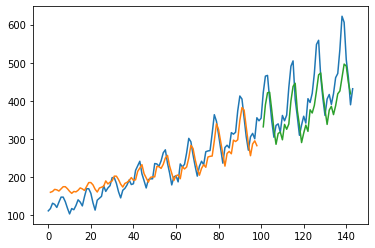

In [ ]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()